## Assignment - Inferential Statistics

## BlueBull Marketing

## Loading data

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats  


In [2]:
file_path=r"C:\Users\shahr\Downloads\Assignment 08 - Assignment -Inferential Statistics -20230120T112415Z-001\Assignment 08 - Assignment -Inferential Statistics\0 CAC _ Case Study Data .xlsx"
data =pd.read_excel(file_path,sheet_name=None)


In [3]:
test_data=data['Test ']
control_data=data['Control']



In [4]:
print(test_data.head())


     Kid Name   Age(In Years)            State  Is Male?  Is Rural Area ?  \
0  Test Kid 1                8  Andhra Pradesh         1                1   
1   Test Kid 2               5  Andhra Pradesh         0                0   
2   Test Kid 3              11  Andhra Pradesh         0                0   
3   Test Kid 4              10  Andhra Pradesh         1                0   
4   Test Kid 5               7  Andhra Pradesh         0                0   

   Is Meat Consumer?  HouseHold Income per month  Base Height     Month 1  \
0                  1                       19246   121.558857  122.049170   
1                  1                       53567   116.674871  116.896417   
2                  1                       46239   136.984796  138.140627   
3                  1                       14763   138.322360  138.779055   
4                  1                       83715   119.125201  119.565419   

      Month 2     Month 3    Month 4      Month 5     Month 6    Month 7  

In [5]:
print(control_data.head())


          Kid Name   Age(In Years)              State  Is Male?  \
0     Control Kid 1              10  Jammu & Kashmir          0   
1    Control Kid 10               2  Jammu & Kashmir          1   
2   Control Kid 100               9         Rajasthan         1   
3  Control Kid 1000              10       Tamil Nadu          0   
4   Control Kid 101              17         Rajasthan         1   

   Is Rural Area ?  Is Meat Consumer?  HouseHold Income per month  \
0                1                  1                92620.405078   
1                1                  0                54818.901794   
2                1                  0                70644.700077   
3                1                  1                66002.033030   
4                1                  1                80633.102578   

   Base Height     Month 1     Month 2     Month 3    Month 4      Month 5  \
0   123.593012  123.946823  124.205991  124.493156  124.630356  124.853042   
1    93.937589   94.140783

## Data Processing - Calculate Height Increase

In [6]:
#Add a new column for Height Increase for the Test group:

test_data['Height Increase'] = test_data['Month 12'] - test_data['Base Height']
#Add a new column for Height Increase for the Control group:
control_data['Height Increase'] = control_data['Month 12'] - control_data['Base Height']



In [7]:
print(test_data[['Kid Name ', 'Height Increase']].head())  # Preview the first 5 rows of test_data
print(control_data[['Kid Name ', 'Height Increase']].head())  # Preview the first 5 rows of control_data


     Kid Name   Height Increase
0  Test Kid 1          6.277132
1   Test Kid 2         8.373400
2   Test Kid 3        10.459073
3   Test Kid 4         6.722161
4   Test Kid 5        11.643533
          Kid Name   Height Increase
0     Control Kid 1         3.167810
1    Control Kid 10         3.055238
2   Control Kid 100         3.836513
3  Control Kid 1000         3.004074
4   Control Kid 101         5.644722


## Hypothesis Testing - Independent T-Test

In [8]:
#Perform the T-test to compare the Test and Control height increases:

t_stat, p_value = stats.ttest_ind(test_data['Height Increase'], control_data['Height Increase'])




In [9]:
#Print the T-statistic and P-value:
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")

T-statistic:60.4904418734261
P-value:0.0


In [10]:
#Interpretation based on the significance level:
alpha =0.05  # significance level
if p_value < alpha:
    print(" Reject the null hypothesis. there is a statistically significant difference.")
else:
    print(" Fail to reject the null hypothesis. No significant difference.")

 Reject the null hypothesis. there is a statistically significant difference.



## Group Data by Age and Calculate Average Height Increase


In [11]:
#Create age groups based on the Age(In Years) column for both Test and Control groups:
test_data['Age Group'] = pd.cut(test_data['Age(In Years) '], bins=[0,5,10,15,20], labels=['0-5','6-10','11-15','16-20'])
control_data['Age Group']=pd.cut(control_data['Age(In Years) '], bins=[0,5,10,15,20], labels=['0-5','6-10','11-15','16-20'])

In [12]:
#Calculate the average height increase by Age Group for both Test and Control:
test_age_group_avg = test_data.groupby('Age Group')['Height Increase'].mean()
control_age_group_avg = control_data.groupby('Age Group')['Height Increase'].mean()

C:\Users\shahr\AppData\Local\Temp\ipykernel_15828\4069633469.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_age_group_avg = test_data.groupby('Age Group')['Height Increase'].mean()
C:\Users\shahr\AppData\Local\Temp\ipykernel_15828\4069633469.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  control_age_group_avg = control_data.groupby('Age Group')['Height Increase'].mean()


In [13]:
#Display the results:
print(" Average Height Increase by Age Group(Test):")
print(test_age_group_avg)

print("\nAverage Height Increase by Age Group(Control):")
print(control_age_group_avg)
      

 Average Height Increase by Age Group(Test):
Age Group
0-5      6.909888
6-10     7.430769
11-15    7.017579
16-20    6.901318
Name: Height Increase, dtype: float64

Average Height Increase by Age Group(Control):
Age Group
0-5      3.689064
6-10     2.977788
11-15    3.021855
16-20    4.033209
Name: Height Increase, dtype: float64


 Visualization - Height Increase by Age Group

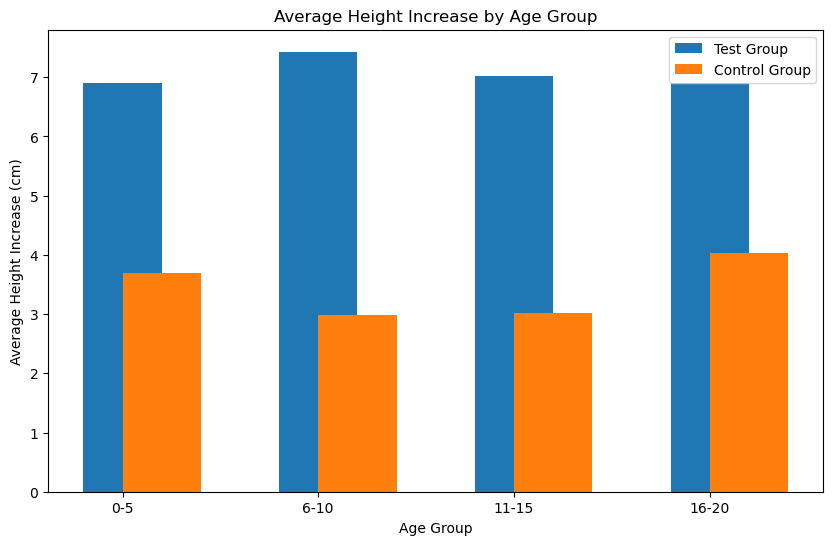

In [14]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(test_age_group_avg.index, test_age_group_avg, width=0.4, label='Test Group', align='center')
plt.bar(control_age_group_avg.index, control_age_group_avg, width=0.4, label='Control Group', align='edge')
plt.xlabel('Age Group')  # X-axis label
plt.ylabel('Average Height Increase (cm)')  # Y-axis label
plt.title('Average Height Increase by Age Group')  # Plot title
plt.legend()  # Display the legend to differentiate between Test and Control groups
plt.show()  # Show the plot


## Conclusion

In [15]:
if p_value < 0.05:  
    print("Conclusion: Height increase is statistically significant. BlueBull enhances children's growth.")  
else:  
    print("Conclusion: No significant difference in height increase.")  


Conclusion: Height increase is statistically significant. BlueBull enhances children's growth.
